In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np
import cv2
import matplotlib.pyplot as plt

print(tf.__version__)
tf.test.is_gpu_available()

2.0.0


True

In [12]:
#Seeting the path 
train_dir = "the-simpsons-characters-dataset\simpsons_dataset"
test_dir = "the-simpsons-characters-dataset\kaggle_simpson_testset"

In [13]:
#We are using an image shape of 32x32 for faster model training
IMG_SHAPE = (32,32,3)
num_classes = 42

In [16]:
datagen_train = ImageDataGenerator(rescale=1./255,rotation_range=30,width_shift_range=0.3,height_shift_range=0.3,horizontal_flip=True,fill_mode='nearest')
datagen_test = ImageDataGenerator(rescale=1./255)

In [17]:
train_generator = datagen_train.flow_from_directory(train_dir,target_size=(32,32))
test_generator = datagen_test.flow_from_directory(test_dir,target_size=(224,224))

Found 20933 images belonging to 42 classes.
Found 990 images belonging to 1 classes.


In [18]:
#A simple architecture of VGG16
model = tf.keras.models.Sequential()

In [19]:
model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',input_shape = IMG_SHAPE,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [21]:
model.fit_generator(train_generator, epochs=30)

Epoch 1/30
655/655 [==============================] - 236s 360ms/step - loss: 3.1083 - acc: 0.2373
Epoch 2/30
655/655 [==============================] - 63s 96ms/step - loss: 2.0595 - acc: 0.4352 3s - loss: 2.0768 - acc: 0.429 - ETA: 3s - loss: 2.0767 - acc: 0. - ETA: 3s - loss: 2.0759 - acc: 0.43 - ET
Epoch 3/30
655/655 [==============================] - 60s 92ms/step - loss: 1.5145 - acc: 0.5814 4s - - ETA: 2s - loss
Epoch 4/30
655/655 [==============================] - 59s 90ms/step - loss: 1.3216 - acc: 0.6385 8s - loss: 1.3331  - ETA: 7s - loss: 1. - ETA: 5s - loss: 1.327 - ETA: 1s - loss: 1.3213 -
Epoch 5/30
655/655 [==============================] - 62s 95ms/step - loss: 1.1125 - acc: 0.6960 10s - loss: 1.1260 - ac
Epoch 6/30
655/655 [==============================] - 60s 92ms/step - loss: 1.0032 - acc: 0.7287 19s - loss: 1. - ETA: 16 - ETA: 5s - los - ETA: 3s - loss: 1.0030 - acc: 0 - ETA: 2s  - ETA: 0s - loss: 1.0031 - acc: 0.7
Epoch 7/30
655/655 [=============================

In [22]:
#Now lets save the model for future use
model.save("simpsons_vgg.h5")

In [23]:
#Now lets try the prediction on the test data
img,label = test_generator.next()

Prediction: apu_nahasapeemapetilon


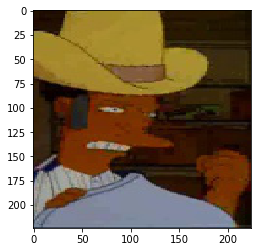

Prediction: bart_simpson


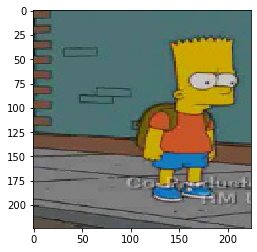

Prediction: moe_szyslak


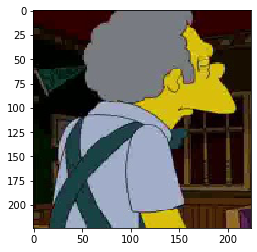

Prediction: lisa_simpson


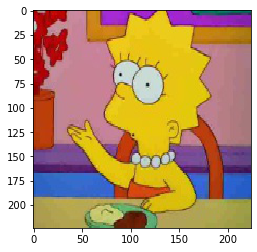

Prediction: krusty_the_clown


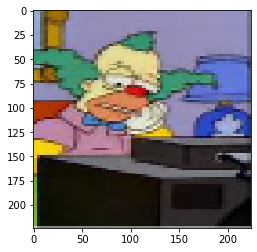

Prediction: principal_skinner


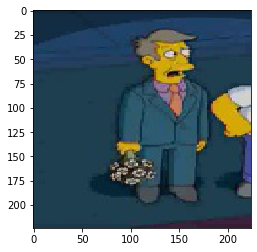

Prediction: nelson_muntz


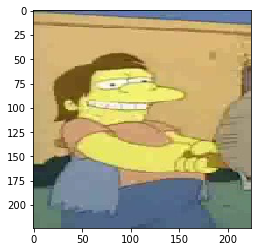

Prediction: lisa_simpson


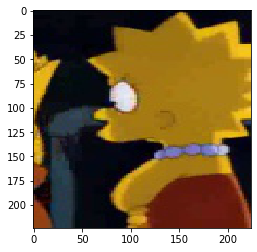

Prediction: chief_wiggum


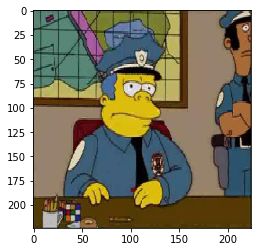

Prediction: sideshow_bob


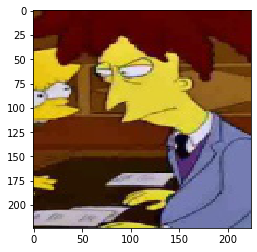

Prediction: comic_book_guy


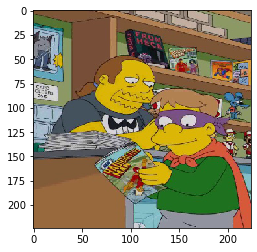

Prediction: mayor_quimby


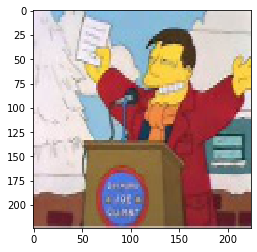

Prediction: abraham_grampa_simpson


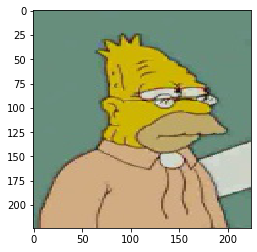

Prediction: bart_simpson


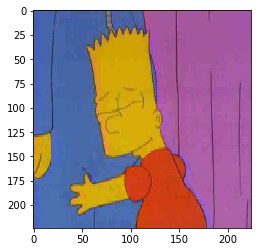

Prediction: lisa_simpson


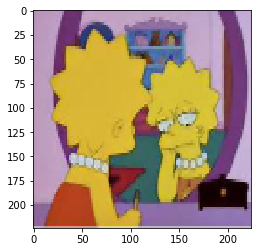

Prediction: krusty_the_clown


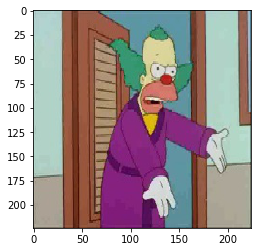

Prediction: milhouse_van_houten


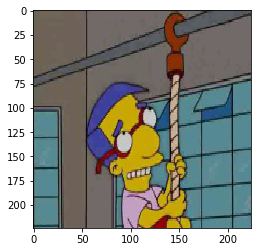

Prediction: moe_szyslak


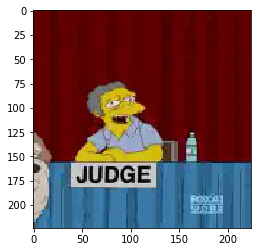

Prediction: moe_szyslak


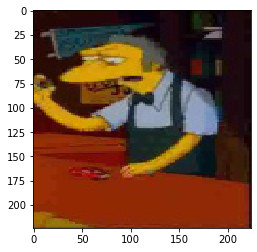

Prediction: abraham_grampa_simpson


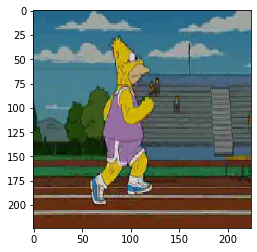

In [24]:
for i in range(20):
    #reshaping the image as per the model input shape
    pred_img = cv2.resize(img[i],(32,32))
    pred_img.shape
    res = model.predict( np.expand_dims(pred_img,axis=0))
    for name, key in train_generator.class_indices.items(): 
        if key == np.argmax(res):
            print(f"Prediction: {name}")
            
    plt.imshow(img[i])
    plt.show()

In [28]:
#Save the model
export_dir = 'simpson_saved_model'
tf.saved_model.save(model,export_dir)

INFO:tensorflow:Assets written to: simpson_saved_model\assets


In [29]:
#Now lets choose the optimzation strategy
optimization = tf.lite.Optimize.OPTIMIZE_FOR_LATENCY

In [30]:
#Generate the tflite model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
converter.optimizations = [optimization]
tflite_model = converter.convert()

In [31]:
#Now lets save the TFlite model
with open('simpsons.tflite','wb') as f:
    f.write(tflite_model)

#Now we can see that the model size has reduced from 25 to 2.5MB

In [49]:
#Time to test the TFlite mode
interpreter = tf.lite.Interpreter(model_content = tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

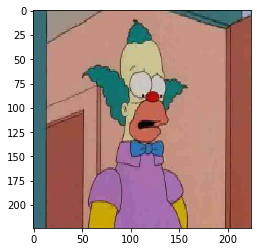

In [50]:
#let us take an image from the test set
pred_img = cv2.resize(img[28],(32,32))
plt.imshow(img[28])

Prediction: krusty_the_clown


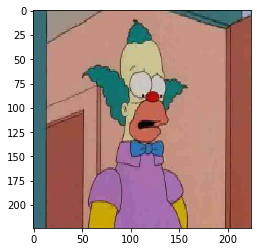

In [54]:

interpreter.set_tensor(input_index, pred_img.reshape(-1,32,32,3))
interpreter.invoke()
res = interpreter.get_tensor(output_index)
for name, key in train_generator.class_indices.items(): 
    if key == np.argmax(res):
        print(f"Prediction: {name}")
plt.imshow(img[28])